In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("../data/processed/cleaned_app_user_behavior.csv")


In [3]:
selected_features = [
    "age",
    "sessions_per_week",
    "avg_session_duration_min",
    "daily_active_minutes",
    "feature_clicks_per_session",
    "notifications_opened_per_week",
    "in_app_search_count",
    "pages_viewed_per_session",
    "crash_events_last_30_days",
    "support_tickets_raised",
    "days_since_last_login",
    "ads_clicked_last_30_days",
    "content_downloads",
    "social_shares",
    "rating_given",
    "account_age_days"
]

X = df[selected_features]


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)



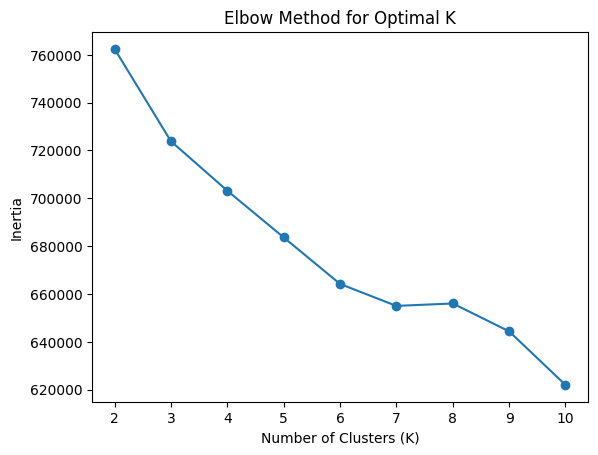

In [6]:
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()



In [7]:
from sklearn.cluster import KMeans

# train final model
kmeans = KMeans(n_clusters=4, random_state=42)

# fit & predict
df["cluster"] = kmeans.fit_predict(X_scaled)


In [8]:
df["cluster"].value_counts()


cluster
0    16527
3    16444
2     8524
1     8505
Name: count, dtype: int64

In [9]:
df.head()



,user_id,age,gender,country,device_type,app_version,sessions_per_week,avg_session_duration_min,daily_active_minutes,feature_clicks_per_session,...,subscription_type,ads_clicked_last_30_days,content_downloads,social_shares,rating_given,churn_risk_score,engagement_score,account_age_days,marketing_source,cluster
0,100000,56,Female,India,iOS,2.1,5,3.41,52.71,13,...,Basic,9,5,2,4.0,0.31,55.79,1152,Referral,0
1,100001,46,Male,UK,iOS,1.0,8,24.44,42.03,7,...,Free,8,3,3,3.0,0.87,82.39,1059,Email Campaign,0
2,100002,32,Female,UK,iOS,1.2,12,5.34,76.69,7,...,Free,11,6,1,2.0,0.63,42.49,678,Google Ads,1
3,100003,25,Male,India,Android,2.0,5,3.98,65.38,16,...,Basic,6,3,1,3.0,0.43,62.81,92,Organic,1
4,100004,38,Male,Australia,Android,1.0,10,12.85,57.06,13,...,Basic,4,4,2,5.0,0.43,38.21,772,Email Campaign,3


In [10]:
cluster_profile = df.groupby("cluster").agg({
    "sessions_per_week": "mean",
    "avg_session_duration_min": "mean",
    "daily_active_minutes": "mean",
    "engagement_score": "mean",
    "churn_risk_score": "mean",
    "days_since_last_login": "mean"
}).round(2)

cluster_profile


,sessions_per_week,avg_session_duration_min,daily_active_minutes,engagement_score,churn_risk_score,days_since_last_login
cluster,,,,,,
0,7.93,12.84,45.42,64.94,0.5,22.13
1,8.24,13.21,45.06,64.75,0.5,21.82
2,8.01,13.23,45.05,64.99,0.5,21.99
3,7.94,13.39,45.03,65.01,0.5,22.09


In [11]:
df.to_csv("../data/processed/clustered_users.csv", index=False)


In [12]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, df["cluster"])
sil_score


0.04988683718527023